In [17]:
import numpy as np
import matplotlib.pyplot as pl


In [42]:
def func(x):
    y = 1 / (1+25*x**2)
    #y = np.sin(x)

    return y

In [20]:
# Task A1
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

In [21]:
# Task A2
def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

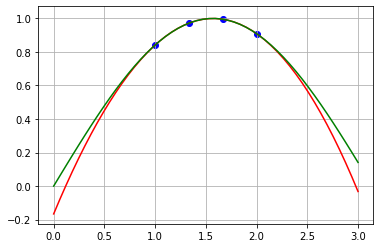

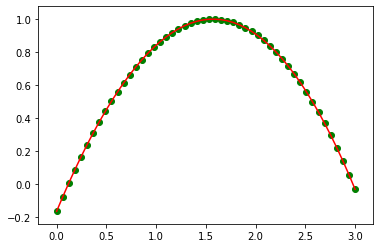

In [27]:
# Task A3


# the the nodal information, i.e. the list of known nodes xn and values yn
a = 1 # lower interval
b = 2 # upper interval
N = 4 # number of nodes
xn = np.linspace(a,b,N)

yn = func(xn)

# set the domain of interpolation
x = np.linspace(0,3,50)

y = LagInterp(xn,yn,x)
# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
# plot the actual function
pl.plot(x,func(x),c='Green')
pl.grid()
pl.show()



# compare against slides in class
# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')

p1 = 0.06783 * x + 0.7736
p2 = -0.4884 * x**2 + 1.533 * x -0.2032
p3 = -0.01212 * x**3 -0.43245 * x**2 + 1.4502 * x -0.1641

pl.scatter(x,p3,c='Green')
pl.show()


1 0.11966264529574411
2 -7.857583347303798e-05
3 0.00022937567905456646
4 3.4301561369076694e-07
5 1.4256012581537192e-07
6 5.089990651185872e-10
7 2.4699131628835858e-12
8 2.8188562595232725e-13
9 -3.1308289294429414e-14
10 4.440892098500626e-16
11 -4.440892098500626e-16
12 0.0
13 -1.1102230246251565e-16
14 1.1102230246251565e-16


/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


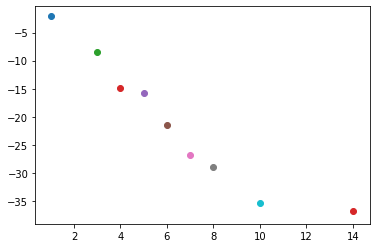

In [28]:
# Task A4
# error analysis

a = 1 # lower interval
b = 2 # upper interval
xp = np.pi/2
y = []
for Nx in range(2,17):
    xn = np.linspace(a,b,Nx)
    yn = func(xn)
    n = len(xn) - 1
    # interpolate for xp
    yp = 0
    # use Langrangian polynomial up to n, included
    for j in range(0,n+1):
        yp += yn[j] * Lagrangian(j,xn,xp)
    y += [yp]
# compute the basic error
y = np.array(y)
for i in range(0,14):
    error = y[i+1] - y[i]
    print(i+1,error)
    pl.scatter(i+1,np.log(error))

In [39]:
# Task B1

def NewtDivDiff(xn,yn):
    # recursive form
    
    # determine number of points
    N = len(xn)
    # set the order: 1 node -> f0; 2 nodes -> f1, etc.
    N = N - 1

    if N == 0:
        # f is the point itself
        f = yn[0]
    else:
        # f is defined recursively as (slide 64):
        # f = ( f[x0,...x(n-1)] - f[x1,...xn] ) / ( x0 - xn)
        f = ( NewtDivDiff(xn[:-1],yn[:-1]) - NewtDivDiff(xn[1:],yn[1:]) ) / ( xn[0] - xn[-1] )
    return f


def NewtDivDiffIt(xn,yn):
    # iterative form
    
    # determine number of points
    N = len(xn)
    # set the order: 1 node -> f0; 2 nodes -> f1, etc.
    n = N - 1
    f = np.copy(yn)
    for j in range(0,n):
        for i in range(0,n-j):
            f[i] = (f[i+1]-f[i]) / (xn[i+j+1]-xn[i])
             
    return f[0]



In [40]:
# Task B2

def NetwonInterp(xn,yn,x):
    Nx = len(xn)
    # determine order
    k = Nx - 1
    
    y = np.ndarray(len(x))

    for i in range(len(x)):
        # determine pn at x = xp
        yp = yn[0]
        for i in range(1,k+1):
            prod = 1
            for j in range(0,i):
                prod *= (x[i]-xn[j])

            yp += prod * NewtDivDiff(xn[0:i+1],yn[0:i+1])

        y[i]= yp
        
    return y



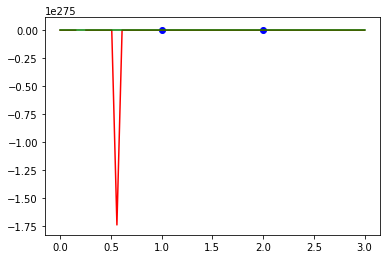

In [43]:
# Task B3


# main
a = 1 # lower interval
b = 2 # upper interval
Nx = 2 # number of nodes
xn = np.linspace(a,b,Nx)
yn = func(xn)
# determine order
k = Nx - 1

# set the domain of interpolation
x = np.linspace(0,3,60)

y = NetwonInterp(xn,yn,x)

# convert list into array
y = np.array(y)   
# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
# plot the actual function
pl.plot(x,func(x),c='Green')
pl.show()

In [3]:
def MyGauss(A,b):
    
    # number of equations
    n = len(b)
    
    # eliminate the unknowns, from first to (n-1)th unknown, to form an upper triangular matrix
    for i in range(0,n-1):
        # eliminate the i-th unknown from the (i+1)th row downwards
        # i.e. set the zeros in column i.
        for j in range(i+1,n):
            # eliminate on row j

            # A(i,i) is the pivot coefficient
            p = A[j,i] / A[i,i]
        
            # compute the new elements of row j in matrix A
            # use slicing
            #A[j,:] = A[j,:] - p * A[i,:]
            # or, alternatively, loop for every cell of row j
            #for k in range(i,n):
            #    A[j,k] = A[j,k] - p * A[i,k]
            A[j,:] = A[j,:] - p * A[i,:]

            # compute the new element of row j in vector b
            b[j] = b[j] - p * b[i]
    
    
    # evauate, by back substitution the solution
    # start from the last unknown and go upward till the first unknown
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        # contribution from b (right hand side of the equation)
        x[i] = b[i] / A[i,i]
        # contribution from the other (already evaluated) unknowns
        # (within the left hand side of the equation)
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]

    return x

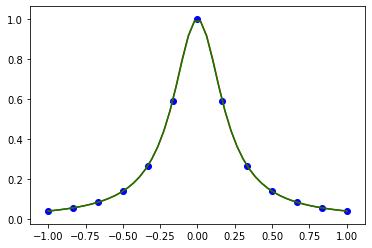

In [4]:
def Spline(xn,yn,, bclower, bcupper,x):
    Nx = len(xn)
    y = np.zeros(len(x))
    # determine cubic coefficients aj, bj, cj, dj
    # there need to be ns = Nx - 1 cubic splines
    ns = Nx - 1

    aj = np.ndarray(ns)
    bj = np.ndarray(ns)
    cj = np.ndarray(ns)
    dj = np.ndarray(ns)

    # form the matrix A (of unknown)
    A = np.zeros((Nx,Nx))
    b = np.zeros(Nx)

    A[0,0] = 1
    b[0] = bclower
    A[-1,-1] = 1
    b[-1] = bcupper
    for j in range(1,ns):
        A[j,j-1] = 1 / (xn[j]-xn[j-1])
        A[j,j] = 2 / (xn[j]-xn[j-1]) + 2 / (xn[j+1]-xn[j])
        A[j,j+1] = 1 / (xn[j+1]-xn[j])

        b[j] = 3 * ( (yn[j]-yn[j-1]) / (xn[j]-xn[j-1])**2 + (yn[j+1]-yn[j]) / (xn[j+1]-xn[j])**2 )

    # invert the matrix
    #v = np.linalg.inv(A).dot(b)
    v = MyGauss(A,b)
    # determine the coefficients
    for j in range(0,ns):
        aj[j] = yn[j]
        bj[j] = v[j]
        cj[j] = 3*(yn[j+1]-yn[j])/(xn[j+1]-xn[j])**2 - (v[j+1]+2*v[j])/(xn[j+1]-xn[j])
        dj[j] = -2*(yn[j+1]-yn[j])/(xn[j+1]-xn[j])**3 + (v[j+1]+v[j])/(xn[j+1]-xn[j])**2

    # interpolate with spline
    for j in range(0,ns):
        y[(xn[j]<=x) & (x<=xn[j+1])] = aj[j] + bj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j]) +  \
              cj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**2 + dj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**3
        
    return y


In [ ]:
# set the nodal info
a = -1 # lower interval
b = 1 # upper interval
Nx = 13 # number of nodes
xn = np.linspace(a,b,Nx)
yn = func(xn)

bclower = 0.0740
bcupper = -0.0740
# set the domain of interpolation
x = np.linspace(a,b,bclower,bcupper,50)

y = Spline(xn,yn,x)
# plot polynomial in the interpolating range
pl.plot(x,y,c='Red')
# plot the initial nodal info only
pl.scatter(xn,yn,c='Blue')
# plot the actual function
pl.plot(x,func(x),c='Green')
pl.show()

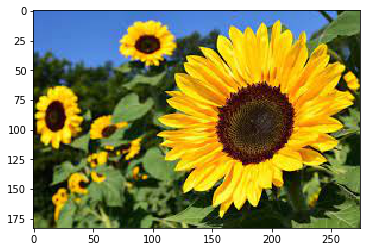

(183, 275, 3)


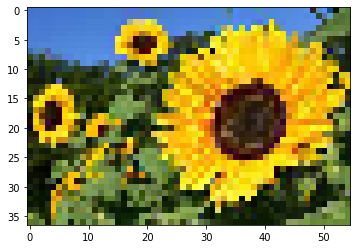

(37, 55, 3)


/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


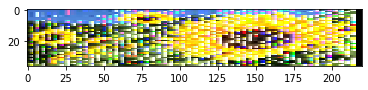

processing:  0
processing:  1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


processing:  2


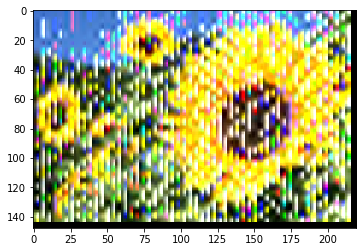

In [38]:
Nscale = 5
Im = pl.imread('Flower.jpg')
pl.imshow(Im)
pl.show()
Nx = Im.shape[1]
Ny = Im.shape[0]
print(Im.shape)


Imsh = np.zeros((int(Ny/Nscale),int(Nx/Nscale),3))
Imsh = Im[0:Ny:Nscale,0:Nx:Nscale,:]
pl.imshow(Imsh)
pl.show()

Nx = Imsh.shape[1]
Ny = Imsh.shape[0]
print(Imsh.shape)


xn = np.ndarray(Nx)
for i in range(0,Nx):
    xn[i] = i
    
Nscale = 4
x = np.linspace(0,Nx,Nx*Nscale)
Iml = np.ndarray((Ny,Nx*Nscale,3))
# work for every color independently
for c in range(0,3):
    # work row by row
    for j in range(0,Ny):
        yn = Imsh[j,:,c]
        y = Spline(xn,yn,x)
        #y = LagInterp(xn,yn,x)
        Iml[j,:,c] =  y
pl.imshow(Iml.astype(int))
pl.show()

xn = np.ndarray(Ny)
for i in range(0,Ny):
    xn[i] = i

x = np.linspace(0,Ny,Ny*Nscale)
Imll = np.zeros((Ny*Nscale,Nx*Nscale,3))
# work for every color independently
for c in range(0,3):
    # work row by row
    for j in range(0,Nx*Nscale):
        yn = Iml[:,j,c]
        y = Spline(xn,yn,x)
        #y = LagInterp(xn,yn,x)
        Imll[:,j,c] =  y
    print('processing: ',c)
Imll = np.trunc(Imll)
Imll = Imll.astype(int)
pl.imshow(Imll)
pl.show()
